# Topic 1: Forecast the prices of Avocado in the US

## Business Objective/Problem
 - Bơ “Hass”, một công ty có trụ sở tại Mexico,
chuyên sản xuất nhiều loại quả bơ được bán
ở Mỹ. Họ đã rất thành công trong những năm
gần đây và muốn mở rộng. Vì vậy, họ muốn
xây dựng mô hình hợp lý để dự đoán giá
trung bình của bơ “Hass” ở Mỹ nhằm xem
xét việc mở rộng các loại trang trại Bơ đang
có cho việc trồng bơ ở các vùng khác.

## Triển khai dự án
### <font color='red'> Bước 1: Business Understanding
Dựa vào mô tả nói trên (hoặc sau khi đặt ra các câu
hỏi cụ thể cho doanh nghiệp và các đối tượng có liên
quan) => xác định được vấn đề:
- Hiện tại: Công ty kinh doanh quả bơ ở rất nhiều vùng của
nước Mỹ với 2 loại bơ là bơ thường và bơ hữu cơ, được
đóng gói theo nhiều quy chuẩn (Small/Large/XLarge Bags),
và có 3 PLU (Product Look Up) khác nhau (4046, 4225,
4770). Nhưng họ chưa có mô hình để dự đoán giá bơ cho
việc mở rộng.
- => Mục tiêu/ Vấn đề: Xây dựng mô hình dự đoán giá trung
bình của bơ “Hass” ở Mỹ => xem xét việc mở rộng sản xuất,
kinh doanh.

### <font color='red'>Bước 2: Data Understanding/ Acquire
#### Từ mục tiêu/ vấn đề đã xác định: xem xét các dữ
liệu mà công ty đang có:
- Dữ liệu được lấy trực tiếp từ máy tính tiền của các nhà bán
lẻ dựa trên doanh số bán lẻ thực tế của bơ Hass.
- Dữ liệu đại diện cho dữ liệu lấy từ máy quét bán lẻ hàng
tuần cho lượng bán lẻ (National retail volume- units) và giá
bơ từ tháng 4/2015 đến tháng 3/2018.
- Giá Trung bình (Average Price) trong bảng phản ánh giá
trên một đơn vị (mỗi quả bơ), ngay cả khi nhiều đơn vị (bơ)
được bán trong bao.
- Mã tra cứu sản phẩm - Product Lookup codes (PLU’s) trong
bảng chỉ dành cho bơ Hass, không dành cho các sản phẩm
khác.


### Toàn bộ dữ liệu được đổ ra và lưu trữ trong tập tin avocado.csv với 18249 record. Với các cột:
  - Date - ngày ghi nhận
  - AveragePrice – giá trung bình của một quả bơ
  - Type - conventional / organic – loại: thông thường/ hữu cơ
  - Region – vùng được bán
  - Total Volume – tổng số bơ đã bán
  - 4046 – tổng số bơ có mã PLU 4046 đã bán
  - 4225 - tổng số bơ có mã PLU 4225 đã bán
  - 4770 - tổng số bơ có mã PLU 4770 đã bán
  - Total Bags – tổng số túi đã bán
  - Small/Large/XLarge Bags – tổng số túi đã bán theo size

Có hai loại bơ trong tập dữ liệu và một số vùng khác nhau. Điều
này cho phép chúng ta thực hiện tất cả các loại phân tích cho
các vùng khác nhau, hoặc phân tích toàn bộ nước Mỹ theo một
trong hai loại bơ.



=> Có thể tập trung giải quyết hai bài toán
- Bài toán 1: USA’s Avocado AveragePrice
Prediction – Sử dụng các thuật toán Regression
như Linear Regression, Random Forest,
XGB Regressor...
- Bài toán 2: Conventional/Organic Avocado
Average Price Prediction for the future in
California/NewYork… - sử dụng các thuật toán
Time Series như ARIMA, Prophet...

### <font color='red'> Bước 3: Data preparation/ Prepare

In [1]:
! pip install fbprophet
! pip install pandas-profiling==2.7.1
! pip install pmdarima

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/LDS0_K271_PhamThiHoa/Project_1'

/content/gdrive/My Drive/LDS0_K271_PhamThiHoa/Project_1


In [4]:
# import libraries
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from pandas_profiling import ProfileReport

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Đọc dữ liệu

In [5]:
data = pd.read_csv('avocado.csv')

In [6]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
data = data.drop('Unnamed: 0', axis = 1)

In [8]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


#### Use DataFrame df

In [10]:
df = data.copy(deep=True)

### 1. Kiểm tra dữ liệu: EDA

In [11]:
ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

From Pandas Prifiling Report, we see that:
-  No missing value
-  No duplicate rows

In [12]:
# Chuyển dữ liệu cột Date sang dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

# Bài Toán 3: California's Conventinal Avocados' Price Prediction in Future
Hãy làm tiếp phần dự đoán giá bơ thường (Conventional Avocado) của vùng California, gồm cả 2 bài toán. Tổng hợp kết quả thu được.

In [13]:
# Tạo một DataFrame mới chứa giá bơ conventinal của vùng California
df3 = df[(df['type']=='conventional') & (df['region']=='California')][['Date','AveragePrice']].sort_values("Date")

In [14]:
df3.dtypes

Date            datetime64[ns]
AveragePrice           float64
dtype: object

In [15]:
df3.columns = ['ds','y']

In [16]:
df3 = df3.reset_index().drop('index', axis = 1)

In [17]:
df3.head()

,ds,y
0,2015-01-04,0.93
1,2015-01-11,0.92
2,2015-01-18,1.02
3,2015-01-25,1.06
4,2015-02-01,0.85


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      169 non-null    datetime64[ns]
 1   y       169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [19]:
df3.tail()

,ds,y
164,2018-02-25,1.03
165,2018-03-04,1.13
166,2018-03-11,1.11
167,2018-03-18,1.02
168,2018-03-25,1.04


In [20]:
df3.head()

,ds,y
0,2015-01-04,0.93
1,2015-01-11,0.92
2,2015-01-18,1.02
3,2015-01-25,1.06
4,2015-02-01,0.85


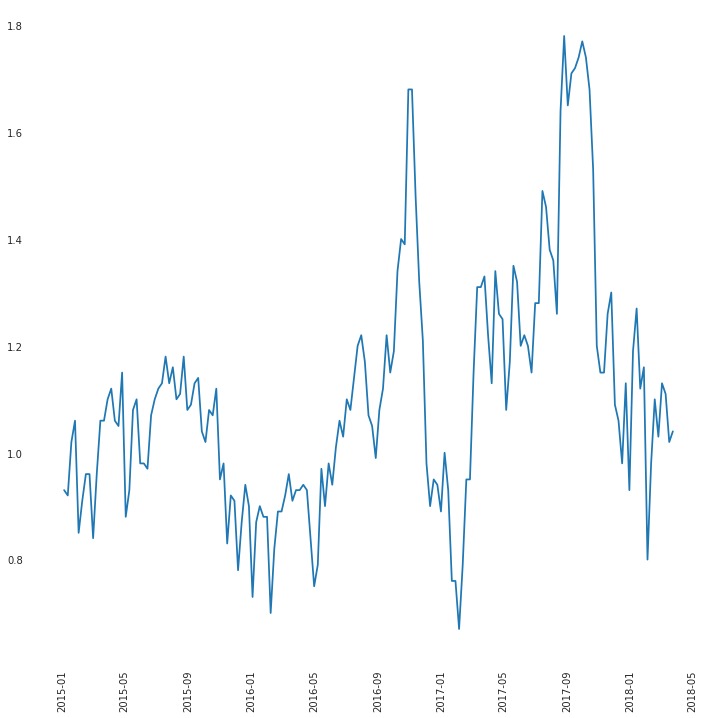

In [21]:
# Trực quan hóa dữ liệu ban đầu
plt.figure(figsize=(12,12))
plt.plot(df3['ds'], df3['y'])
plt.xticks(rotation = 90)
plt.show()

Giá bơ thường tại vùng California:
- Nhìn chung giá bơ tăng qua các năm
- Nam 2015 giá bơ chưa có biến động mạnh trong năm, nhưng đến năm 2016 và 2017 giá bơ thấp từ đầu năm và tăng dần đến cuối năm sau đó giảm mạnh qua đầu năm sau

In [22]:
df_arima = df3.copy(deep = True)
df_arima.index = pd.to_datetime(df_arima.ds)
df_arima = df_arima.drop('ds', axis = 1)
df_arima.head()

,y
ds,
2015-01-04,0.93
2015-01-11,0.92
2015-01-18,1.02
2015-01-25,1.06
2015-02-01,0.85


# Decomposition

In [23]:
from statsmodels.tsa.seasonal import  seasonal_decompose
result = seasonal_decompose(df_arima, model= 'multiplicative')
result

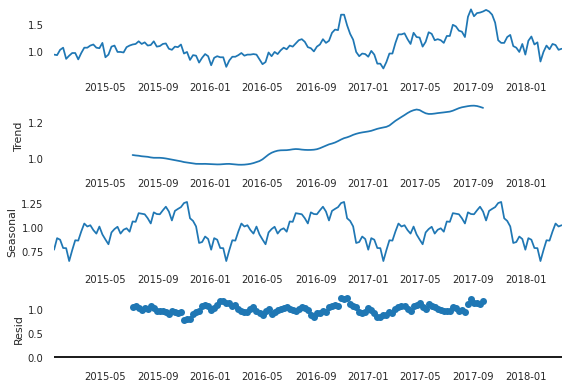

In [24]:
result.plot()
plt.show()

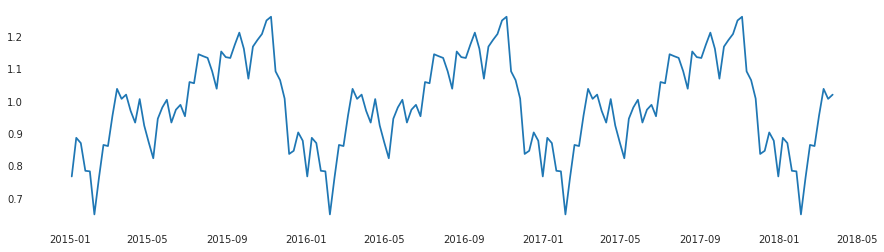

In [25]:
# Trực quan hóa seasonal
plt.figure(figsize=(15,4))
plt.plot(result.seasonal)
plt.show()

Seasonal: Giá thấp từ đâu đến giữa năm, sau đó tăng lên đỉnh điểm vào cuối năm, sau đó giá bơ giảm mạnh đến đầu năm sau

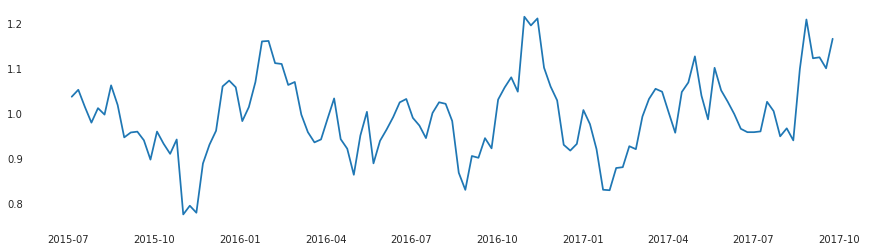

In [26]:
# Trực quan hóa resid
plt.figure(figsize=(15,4))
plt.plot(result.resid)
plt.show()

Residuals nhìn chung khá ổn định theo năm

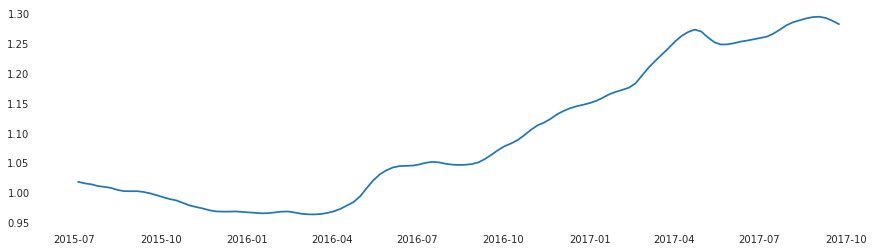

In [27]:
# Trực quan hóa trend
plt.figure(figsize=(15,4))
plt.plot(result.trend)
plt.show()

Giá bơ có giảm từ tháng 07/2015 đến tháng 04/2016, nhưng sau đó thì tăng mạnh đến tháng 04/2017. Từ tháng 04/2017 đến tháng 10/2017 có giảm nhẹ sau đó tăng chậm

# ARIMA

In [28]:
stepwise_model = auto_arima(df_arima, start_p=2, start_q=2, 
                           max_p=5, max_q=5, m=12,
                           start_P=1, d=1, D=None, seasonal=True,
                           trace=True, error_action='ignore',
                           suppres_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-263.637, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-262.807, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-260.879, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-261.306, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-264.801, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-262.200, Time=0.15 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-262.473, Time=0.19 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-261.681, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-261.502, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-261.658, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.49 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 3.625 seconds


In [29]:
# ACI
print(stepwise_model.aic())

-264.80104445535403


In [30]:
# Chia tập dữ liệu train - 80%, test - 20%
train, test = df_arima.iloc[:135], df_arima.iloc[135:]

In [31]:
train.shape, test.shape

((135, 1), (34, 1))

In [32]:
train.head()

,y
ds,
2015-01-04,0.93
2015-01-11,0.92
2015-01-18,1.02
2015-01-25,1.06
2015-02-01,0.85


In [33]:
test.head()

,y
ds,
2017-08-06,1.36
2017-08-13,1.26
2017-08-20,1.64
2017-08-27,1.78
2017-09-03,1.65


In [34]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [35]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [36]:
future_forecast

array([1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38,
       1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38,
       1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38,
       1.38])

In [37]:
future_forecast = pd.DataFrame(future_forecast, index= test.index, columns=['Prediction'])
pred_arima = future_forecast.copy()
pred_arima['Actual'] = test.y
pred_arima

,Prediction,Actual
ds,,
2017-08-06,1.38,1.36
2017-08-13,1.38,1.26
2017-08-20,1.38,1.64
2017-08-27,1.38,1.78
2017-09-03,1.38,1.65
2017-09-10,1.38,1.71
2017-09-17,1.38,1.72
2017-09-24,1.38,1.74
2017-10-01,1.38,1.77


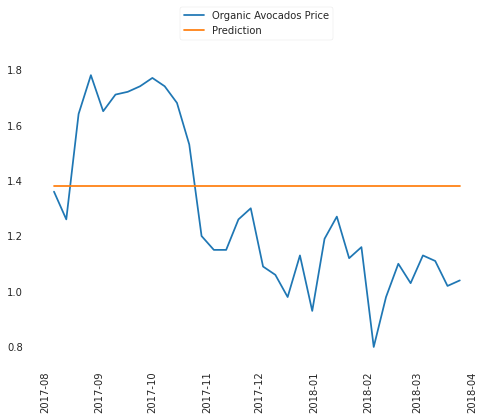

In [38]:
plt.plot(test, label = 'Organic Avocados Price')
plt.plot(future_forecast, label = 'Prediction')
plt.xticks(rotation = 'vertical')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.show()

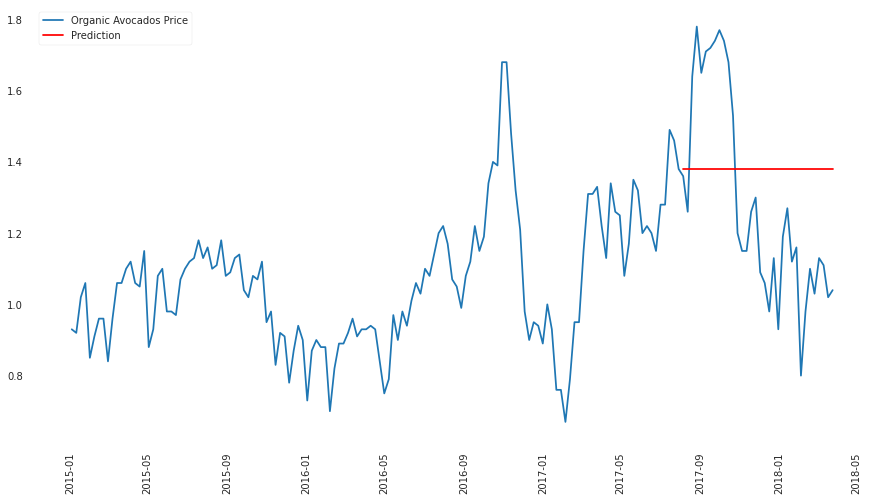

In [39]:
# Trực quan hóa dữ liệu cho cả tập Train và Test (Từ 2015-01-04 đến 2018-03-25)
plt.figure(figsize=(15,8))
plt.plot(df_arima, label = 'Organic Avocados Price')
plt.plot(future_forecast, label = 'Prediction', color = 'red')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

Nhận xét: Kết quả dự đoán của Model Arima cho tập dữ liệu test gần như là không đổi, điều này cho thấy rằng mô mình ARIMA chưa thể phù hợp cho tập dữ liệ này.
=> Cần sử dụng một model khác cho bài toán này

In [40]:
mse_arima = mean_squared_error(test,future_forecast)
mae_arima = mean_absolute_error(test, future_forecast)

In [41]:
print('MSE: ', mse_arima)
print('MAE: ', mae_arima)

MSE:  0.09047647058823526
MAE:  0.27823529411764697


# HoltWinters

In [42]:
train.head()

,y
ds,
2015-01-04,0.93
2015-01-11,0.92
2015-01-18,1.02
2015-01-25,1.06
2015-02-01,0.85


In [43]:
train.tail()

,y
ds,
2017-07-02,1.28
2017-07-09,1.28
2017-07-16,1.49
2017-07-23,1.46
2017-07-30,1.38


In [44]:
test.head()

,y
ds,
2017-08-06,1.36
2017-08-13,1.26
2017-08-20,1.64
2017-08-27,1.78
2017-09-03,1.65


In [45]:
test.tail()

,y
ds,
2018-02-25,1.03
2018-03-04,1.13
2018-03-11,1.11
2018-03-18,1.02
2018-03-25,1.04


In [46]:
model_holt = ExponentialSmoothing(train, seasonal='add',
                             trend = 'add',
                             damped_trend=True,
                             seasonal_periods= 52).fit()
pred_holt = model_holt.predict(start=test.index[0], 
                     end=test.index[-1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



In [47]:
pred = pd.DataFrame(pred_holt,columns=[ 'Predict'])
# pred_holt = pred.copy()
# pred_holt['Actual'] = test.y
pred

,Predict
2017-08-06,1.338692
2017-08-13,1.292316
2017-08-20,1.315891
2017-08-27,1.234420
2017-09-03,1.282899
2017-09-10,1.321337
2017-09-17,1.374730
2017-09-24,1.288076
2017-10-01,1.296390
2017-10-08,1.399672


In [48]:
start=test.index[0], 
end=test.index[-1]
start, end

((Timestamp('2017-08-06 00:00:00'),), Timestamp('2018-03-25 00:00:00'))

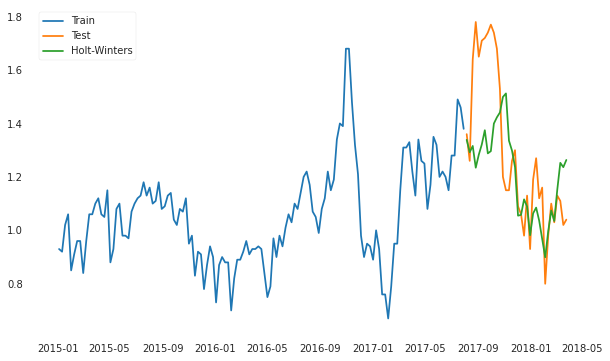

In [49]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')
plt.show()

In [50]:
mse_holt = mean_squared_error(test,pred)
mae_holt = mean_absolute_error(test, pred)
print('MSE - Holt: ', mse_holt)
print('MAE - Holt: ', mae_holt)

MSE - Holt:  0.05691279714607815
MAE - Holt:  0.1820436501983321


# Dự đoán 1 năm tiếp theo

In [51]:
s = datetime.datetime(2018, 4, 1)
e = datetime.datetime(2019, 4, 1)
pred_next_1_years = model_holt.predict(start= s, end=e)
pred_next_1_years 

2018-04-01    1.233603
2018-04-08    1.187066
2018-04-15    1.250437
2018-04-22    1.227062
2018-04-29    1.103606
2018-05-06    1.076736
2018-05-13    1.216472
2018-05-20    1.259468
2018-05-27    1.235738
2018-06-03    1.181944
2018-06-10    1.208101
2018-06-17    1.250868
2018-06-24    1.233583
2018-07-01    1.306247
2018-07-08    1.302201
2018-07-15    1.408112
2018-07-22    1.400644
2018-07-29    1.389812
2018-08-05    1.338505
2018-08-12    1.292139
2018-08-19    1.315722
2018-08-26    1.234260
2018-09-02    1.282747
2018-09-09    1.321193
2018-09-16    1.374593
2018-09-23    1.287946
2018-09-30    1.296266
2018-10-07    1.399554
2018-10-14    1.422805
2018-10-21    1.441023
2018-10-28    1.499210
2018-11-04    1.512371
2018-11-11    1.335503
2018-11-18    1.298618
2018-11-25    1.236706
2018-12-02    1.054770
2018-12-09    1.057813
2018-12-16    1.115828
2018-12-23    1.088824
2018-12-30    0.981669
2019-01-06    1.063420
2019-01-13    1.085005
2019-01-20    1.036435
2019-01-27 

In [52]:
x = pd.Series(pred_next_1_years)

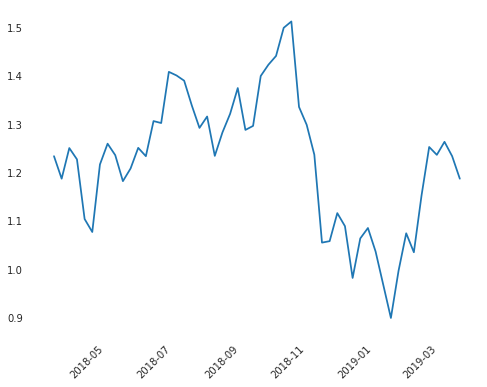

In [53]:
plt.figure(figsize=(8,6))
plt.plot(x.index, x.values)
plt.xticks(rotation = 45)
plt.show()

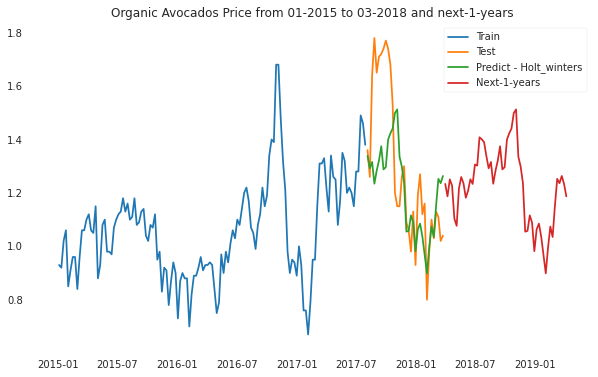

In [54]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label = 'Train')
plt.plot(test.index, test, label = 'Test')
plt.plot(pred.index, pred, label = 'Predict - Holt_winters')
plt.plot(x.index, x.values, label = 'Next-1-years')
plt.legend(loc = 'best')
plt.title('Organic Avocados Price from 01-2015 to 03-2018 and next-1-years')
plt.show()

## Facebook Prophet

In [55]:
# Train va test: Train: 80%, test: 20%
# Total: 169 => Train: 135, Test: 34
train = df3.drop(df3.index[-34:])
test = df3.drop(df3.index[0:-34])

In [56]:
train.head()

,ds,y
0,2015-01-04,0.93
1,2015-01-11,0.92
2,2015-01-18,1.02
3,2015-01-25,1.06
4,2015-02-01,0.85


In [57]:
train.tail()

,ds,y
130,2017-07-02,1.28
131,2017-07-09,1.28
132,2017-07-16,1.49
133,2017-07-23,1.46
134,2017-07-30,1.38


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      135 non-null    datetime64[ns]
 1   y       135 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


In [59]:
test.head()

,ds,y
135,2017-08-06,1.36
136,2017-08-13,1.26
137,2017-08-20,1.64
138,2017-08-27,1.78
139,2017-09-03,1.65


In [60]:
test.tail()

,ds,y
164,2018-02-25,1.03
165,2018-03-04,1.13
166,2018-03-11,1.11
167,2018-03-18,1.02
168,2018-03-25,1.04


In [61]:
threshold_date = pd.to_datetime('2017-07-30')

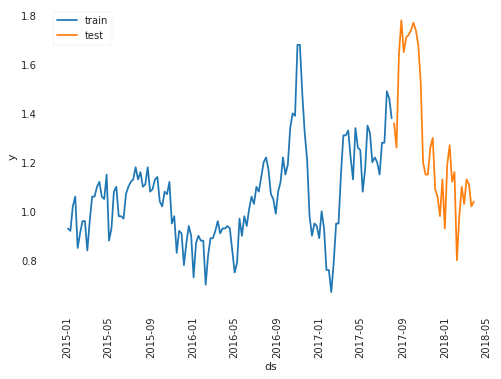

In [62]:
fig, ax = plt.subplots()
sns.lineplot(x='ds', y='y', label='train', data=train, ax=ax)
sns.lineplot(x='ds', y='y', label='test', data=test, ax=ax)
# ax.axvline(threshold_date, linestyle='--', label='train test split', color = 'r')
ax.legend(loc='upper left')
plt.xticks(rotation = 90)
plt.show()

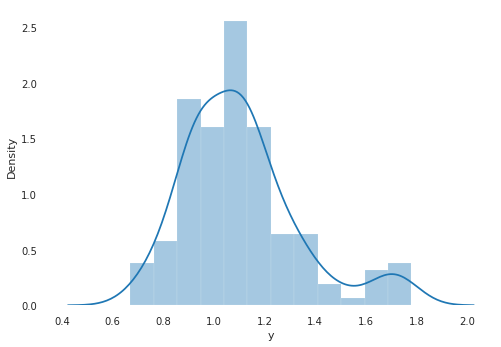

In [63]:
sns.distplot(df3.y)

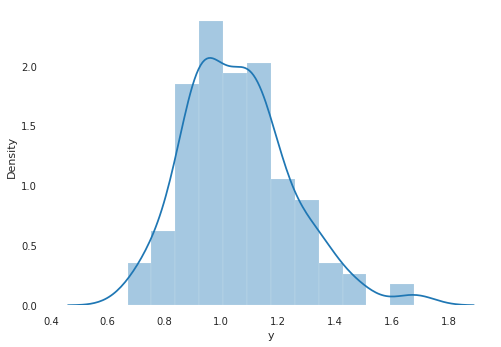

In [64]:
sns.distplot(train.y)

In [65]:
model_prp = Prophet(yearly_seasonality=True, \
                daily_seasonality = False, weekly_seasonality = False)

In [66]:
model_prp.fit(train)

In [67]:
# 34 weeks in test and 2 years to predict new values
weeks = pd.date_range('2017-08-06','2020-04-01',freq = 'W').strftime('%Y-%m-%d').tolist()
future = pd.DataFrame(weeks)
                  

In [68]:
future.head()

,0
0,2017-08-06
1,2017-08-13
2,2017-08-20
3,2017-08-27
4,2017-09-03


In [69]:
future.columns = ['ds']

In [70]:
future['ds'] = pd.to_datetime(future['ds'])

In [71]:
future.head()

,ds
0,2017-08-06
1,2017-08-13
2,2017-08-20
3,2017-08-27
4,2017-09-03


In [72]:
future.tail()

,ds
134,2020-03-01
135,2020-03-08
136,2020-03-15
137,2020-03-22
138,2020-03-29


In [73]:
# Use the model to make a forecast
forecast = model_prp.predict(future)

In [74]:
forecast[['ds','yhat']].tail()

,ds,yhat
134,2020-03-01,1.781740
135,2020-03-08,1.853650
136,2020-03-15,1.887824
137,2020-03-22,1.895784
138,2020-03-29,1.902070


In [75]:
df3.y.mean()

1.1054437869822493

In [76]:
test.y.mean()

1.2876470588235291

In [77]:
y_test = test['y'].values

In [78]:
y_pred = forecast['yhat'].values[:34]

In [79]:
mse_prp = mean_squared_error(y_test,y_pred)
mae_prp = mean_absolute_error(y_test, y_pred)
print('MSE - FBProphet: ', mse_prp)
print('MAE - FBProphet: ', mae_prp)

MSE - FBProphet:  0.07032866715936859
MAE - FBProphet:  0.22797594687708123


# Visulaize the result

In [80]:
y_test_value = pd.DataFrame(y_test, index = pd.to_datetime(test['ds']),columns=['Actual'])
y_pred_value = pd.DataFrame(y_pred, index = pd.to_datetime(test['ds']),columns=['Prediction'])


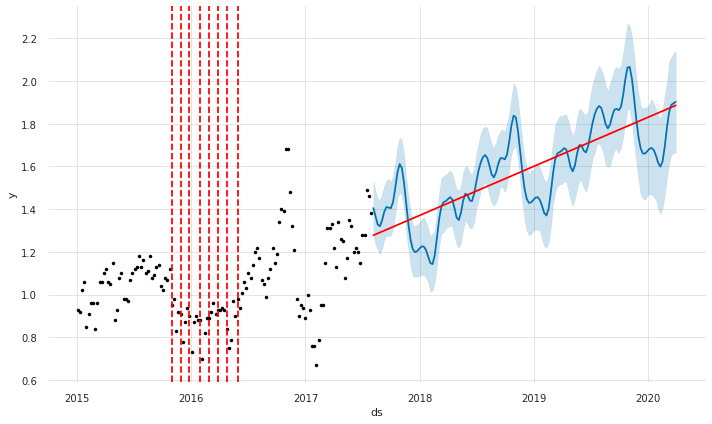

In [81]:
fig = model_prp.plot(forecast)
fig.show()
a = add_changepoints_to_plot(fig.gca(), model_prp, forecast)

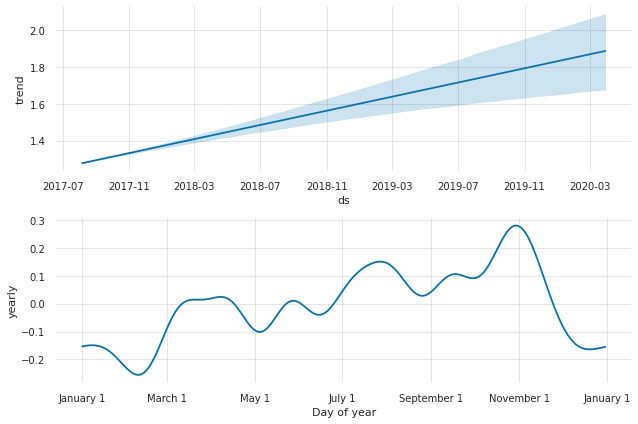

In [82]:
fig1 = model_prp.plot_components(forecast)
fig1.show()

In [83]:
forecast[['ds','yhat']].tail(17)

,ds,yhat
122,2019-12-08,1.684645
123,2019-12-15,1.661016
124,2019-12-22,1.660205
125,2019-12-29,1.670769
126,2020-01-05,1.682318
127,2020-01-12,1.686668
128,2020-01-19,1.676985
129,2020-01-26,1.650729
130,2020-02-02,1.617135
131,2020-02-09,1.599606


Long term prdiction for the next prediction - 3 years



In [84]:
model = Prophet(yearly_seasonality= True,\
            daily_seasonality = False, weekly_seasonality = False)

In [85]:
model.fit(df3)

In [86]:
future = model.make_future_dataframe(periods=52*3, freq = 'W') # Next 3 years

In [87]:
forecast =model.predict(future)

In [88]:
forecast.shape

(325, 16)

In [89]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          325 non-null    datetime64[ns]
 1   trend                       325 non-null    float64       
 2   yhat_lower                  325 non-null    float64       
 3   yhat_upper                  325 non-null    float64       
 4   trend_lower                 325 non-null    float64       
 5   trend_upper                 325 non-null    float64       
 6   additive_terms              325 non-null    float64       
 7   additive_terms_lower        325 non-null    float64       
 8   additive_terms_upper        325 non-null    float64       
 9   yearly                      325 non-null    float64       
 10  yearly_lower                325 non-null    float64       
 11  yearly_upper                325 non-null    float64       

In [90]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [91]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail(12)


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
313,2021-01-03,1.631258,1.402334,1.846832,1.797354,1.672219,1.925933
314,2021-01-10,1.664653,1.452053,1.878508,1.800486,1.674779,1.929972
315,2021-01-17,1.663070,1.434909,1.897611,1.803618,1.677340,1.934012
316,2021-01-24,1.619542,1.406583,1.823232,1.806751,1.678617,1.938452
317,2021-01-31,1.558158,1.341418,1.780547,1.809883,1.679746,1.943274
318,2021-02-07,1.523102,1.299924,1.741127,1.813015,1.682141,1.948065
319,2021-02-14,1.546183,1.321478,1.780864,1.816148,1.683073,1.952282
320,2021-02-21,1.618944,1.397560,1.856789,1.819280,1.683506,1.956985
321,2021-02-28,1.698439,1.478869,1.918061,1.822412,1.684044,1.962087
322,2021-03-07,1.745463,1.517989,1.959273,1.825545,1.686080,1.966584


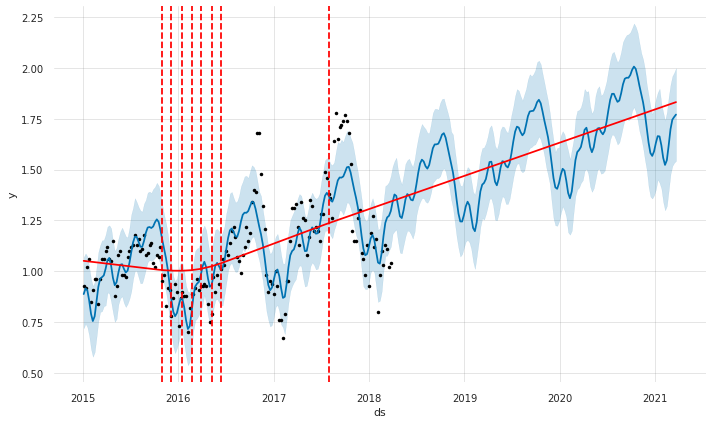

In [92]:
fig = model.plot(forecast)
fig.show()
a = add_changepoints_to_plot(fig.gca(),model,forecast)

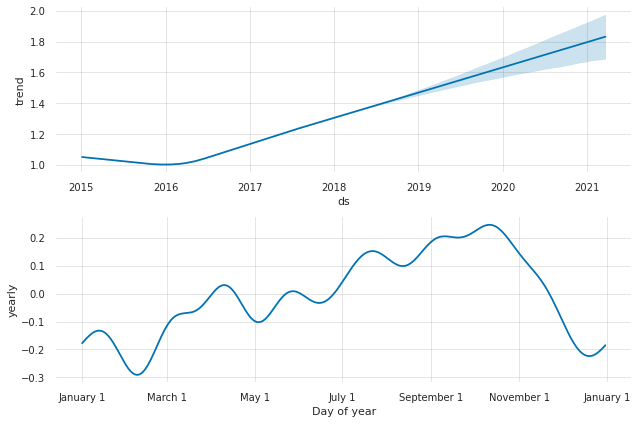

In [93]:
fig1 = model.plot_components(forecast)
fig1.show()

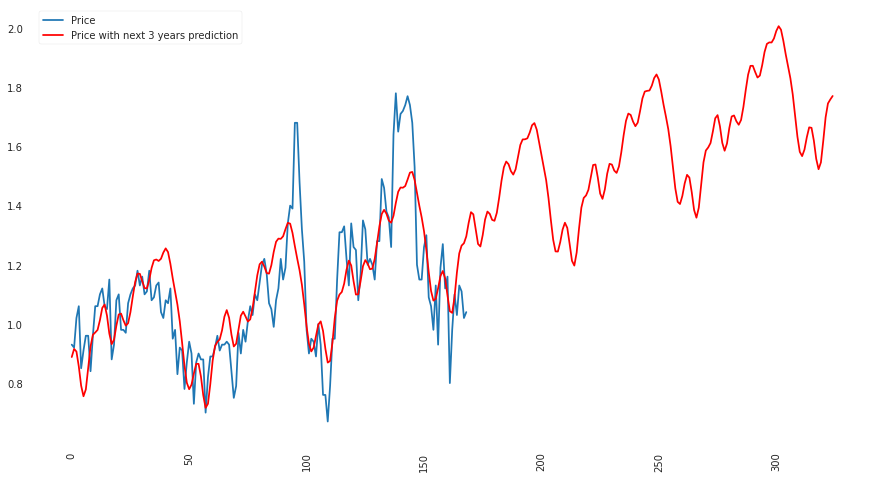

In [94]:
plt.figure(figsize=(15,8))
plt.plot(df3['y'], label='Price')
plt.plot(forecast['yhat'], label='Price with next 3 years prediction', 
         color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


# So sánh và lựa chọn Model

In [95]:
df_cv = pd.DataFrame({'model': ['ARIMA', 'Holt-Winters', 'FbProphet'], 'MSE': [mse_arima, mse_holt, mse_prp], 'MAE': [mae_arima, mae_holt, mae_prp]})
df_cv

,model,MSE,MAE
0,ARIMA,0.090476,0.278235
1,Holt-Winters,0.056913,0.182044
2,FbProphet,0.070329,0.227976


Từ kết quả trên nhận thấy
- Mô hình ARIMA chưa áp dụng được tốt vào bài toán này
- Cả hai mô hình FBProphet và Holt-Winters đều có thể dùng để dự đoán giá bơ thường. Tuy nhiên mô hình Holt-Winters có chỉ số MSE/MAE thấp hơn so với mô hình FB Prophet, do đó, có thể chọn Holt-Winters  để thực hiện việc dự đoán giá bơ organic

In [96]:
# Lưu kết quả dự đoán giá bơ thường của 1 năm tiếp theo
df_predict = pd.DataFrame(pred_next_1_years )
df_predict.head()

,0
2018-04-01,1.233603
2018-04-08,1.187066
2018-04-15,1.250437
2018-04-22,1.227062
2018-04-29,1.103606


# Lưu Model

In [97]:
import pickle
pkl_filename = 'Cau3_PJ1.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_holt, file)